In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Contenido_de_Nitrogeno: Proporción de contenido de nitrógeno en el
suelo.
Contenido_de_Fosforo: Proporción de contenido de fósforo en el suelo.
Contenido_de_Potasio: Proporción de contenido de potasio en el suelo.
Temperatura_C: Temperatura en grados Celsius.
Humedad_Relativa: Humedad relativa en porcentaje.
Nivel_de_pH: Nivel de pH del suelo.
Precipitacion_mm: Cantidad de precipitación en milímetros.
Tipo_de_Cultivo: Tipo de cultivo recomendado en función de los
parámetros anteriores.

a. Análisis Exploratorio de Datos (EDA)
Para realizar un EDA exhaustivo del dataset, considere las siguientes
preguntas:

¿Cómo se distribuyen los valores en cada una de las variables?

¿Existen correlaciones entre las diferentes variables del suelo y los tipos de cultivos?

¿Cómo varía la recomendación de cultivo según las condiciones del
suelo y el clima?

¿Existen valores atípicos o faltantes que deban ser tratados?


In [24]:
df = pd.read_csv('tipo_cultivo.csv')
cultivos = df.copy()
cultivos.shape


(2200, 9)

Los datos tienen 2200 filas y 9 columnas

In [25]:
cultivos.head()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
0,0,90,42,43,20.880,82.003,6.503,202.936,rice
1,1,85,58,41,21.770,80.320,7.038,226.656,rice
2,2,60,55,44,23.004,82.321,7.840,263.964,rice
3,3,74,35,40,26.491,80.158,6.980,242.864,rice
4,4,78,42,42,20.130,81.605,7.628,262.717,rice


In [26]:
cultivos.tail()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
2195,2195,107,34,32,26.775,66.413,6.780,177.775,coffee
2196,2196,99,15,27,27.417,56.636,6.087,127.925,coffee
2197,2197,118,33,30,24.132,67.225,6.363,173.323,coffee
2198,2198,117,32,34,26.272,52.127,6.759,127.175,coffee
2199,2199,104,18,30,23.603,60.396,6.780,140.937,coffee


Tipos de datos

In [27]:
cultivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2200 non-null   int64  
 1   Contenido_de_Nitrogeno  2200 non-null   int64  
 2   Contenido_de_Fosforo    2200 non-null   int64  
 3   Contenido_de_Potasio    2200 non-null   int64  
 4   Temperatura_C           2200 non-null   float64
 5   Humedad_Relativa        2200 non-null   float64
 6   Nivel_de_pH             2200 non-null   float64
 7   Precipitacion_mm        2200 non-null   float64
 8   Tipo_de_Cultivo         2200 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [28]:
cultivos = cultivos.drop(columns=['Unnamed: 0']) #borro esta columna para not ener doble indice

Con validate columns puedo ver las columnas con sus nombres, la cantidad de valores unicos por columna (y cuales son), la cantidad y % de nulos y una muestra de valores de esa columna

In [29]:
from funciones_importantes import validate_columns


In [30]:
validate_columns(cultivos)

,Column,Unique_Values,Num_Unique_Values,Num_Null_Values,Sample_Unique_Values,%_null
0,Contenido_de_Nitrogeno,"[90, 85, 60, 74, 78, 69, 94, 89, 68, 91, 93, 7...",137,0,"[80, 6, 28, 23, 47]",0.000
1,Contenido_de_Fosforo,"[42, 58, 55, 35, 37, 53, 54, 46, 56, 50, 48, 3...",117,0,"[32, 53, 26, 41, 36]",0.000
2,Contenido_de_Potasio,"[43, 41, 44, 40, 42, 38, 36, 37, 39, 35, 45, 1...",73,0,"[19, 21, 10, 52, 17]",0.000
3,Temperatura_C,"[20.87974371, 21.77046169, 23.00445915, 26.491...",2200,0,"[27.58258929, 26.90435747, 26.52872817, 25.068...",0.000
4,Humedad_Relativa,"[82.00274423, 80.31964408, 82.3207629, 80.1583...",2200,0,"[90.03969587, 90.50621806, 59.4375337, 88.7285...",0.000
5,Nivel_de_pH,"[6.502985292000001, 7.038096361, 7.840207144, ...",2200,0,"[6.448792688999999, 6.366219551, 5.952367662, ...",0.000
6,Precipitacion_mm,"[202.9355362, 226.6555374, 263.9642476, 242.86...",2200,0,"[108.6793978, 91.9223468, 45.04467075, 63.6879...",0.000
7,Tipo_de_Cultivo,"[rice, maize, chickpea, kidneybeans, pigeonpea...",22,0,"[coconut, mothbeans, pomegranate, lentil, mung...",0.000


Se observa que los datos no tienen valores nulos, por lo tanto sigo con el analisis 

In [31]:
cultivos.describe() #medidas estdisticas simples para cada columna


,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm
count,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000
mean,50.552,53.363,48.149,25.616,71.482,6.469,103.464
std,36.917,32.986,50.648,5.064,22.264,0.774,54.958
min,0.000,5.000,5.000,8.826,14.258,3.505,20.211
25%,21.000,28.000,20.000,22.769,60.262,5.972,64.552
50%,37.000,51.000,32.000,25.599,80.473,6.425,94.868
75%,84.250,68.000,49.000,28.562,89.949,6.924,124.268
max,140.000,145.000,205.000,43.675,99.982,9.935,298.560


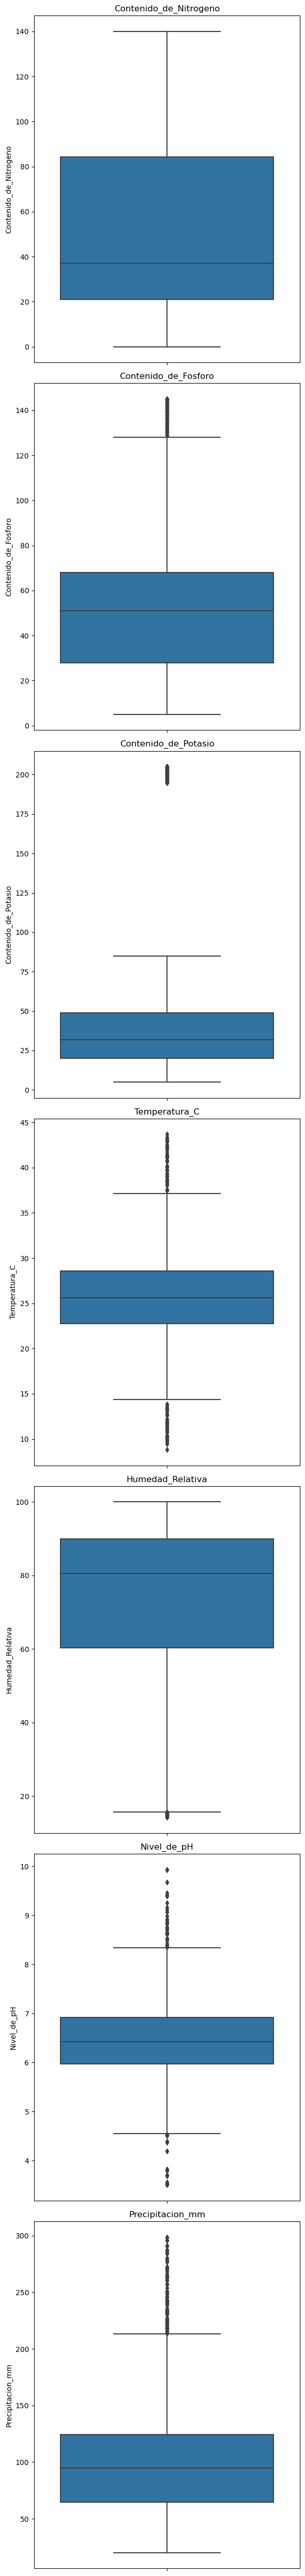

In [32]:
from funciones_importantes import grafico_out_boxplot
grafico_out_boxplot(cultivos)

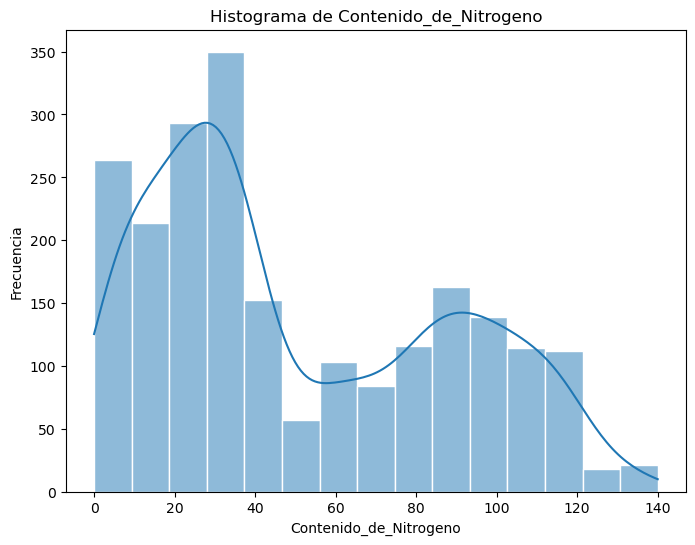

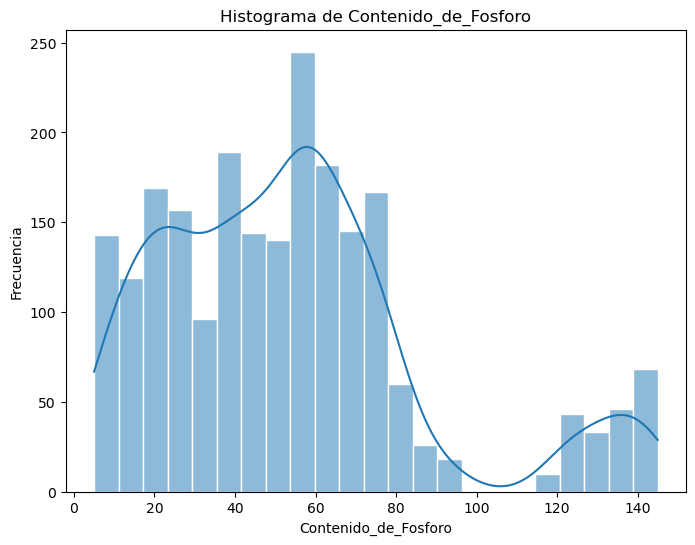

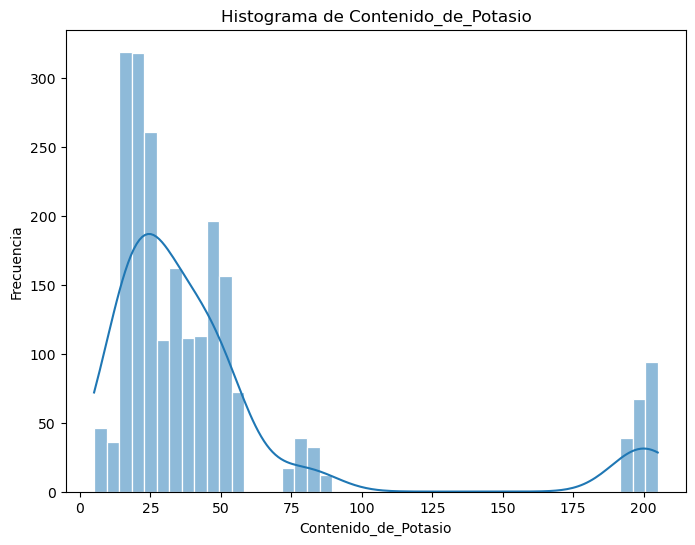

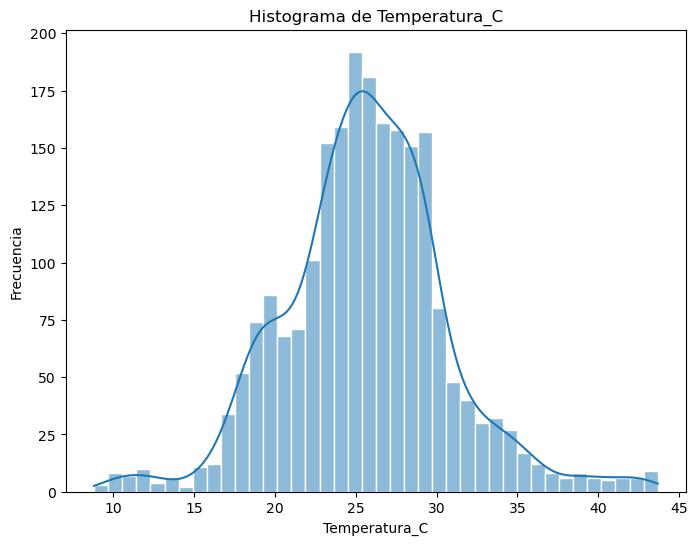

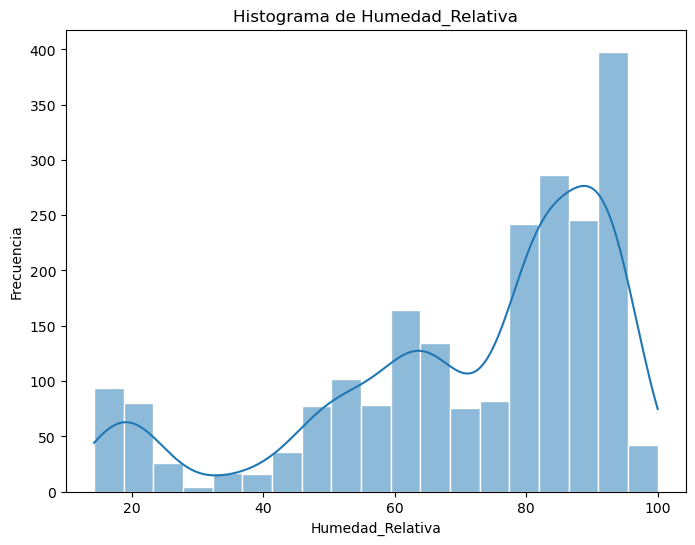

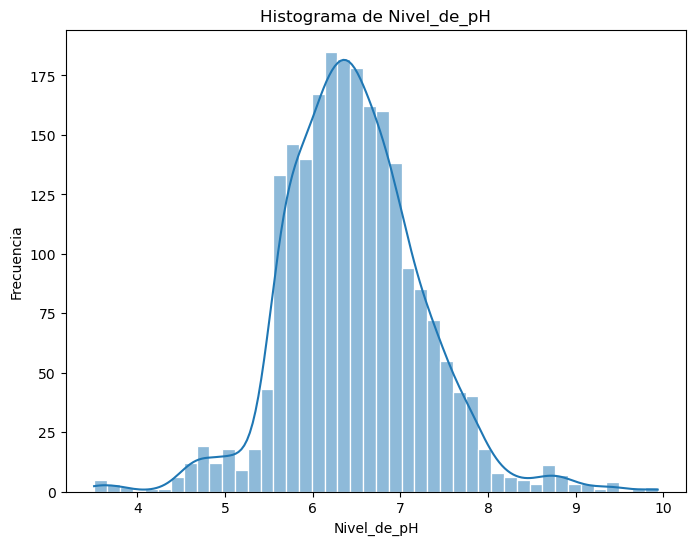

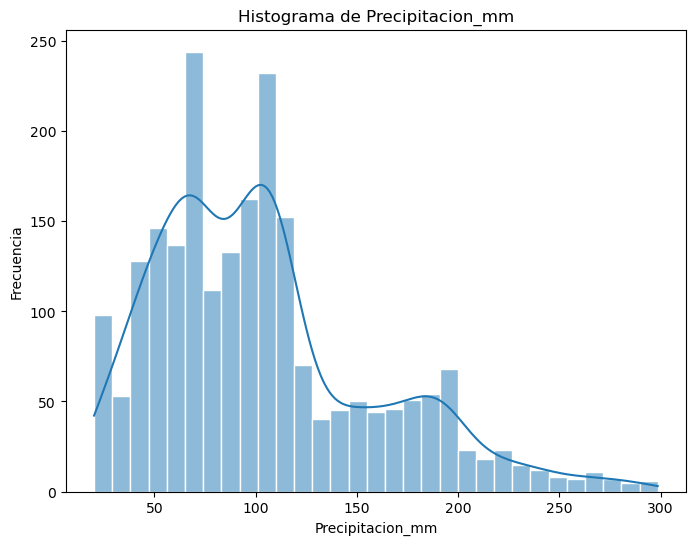

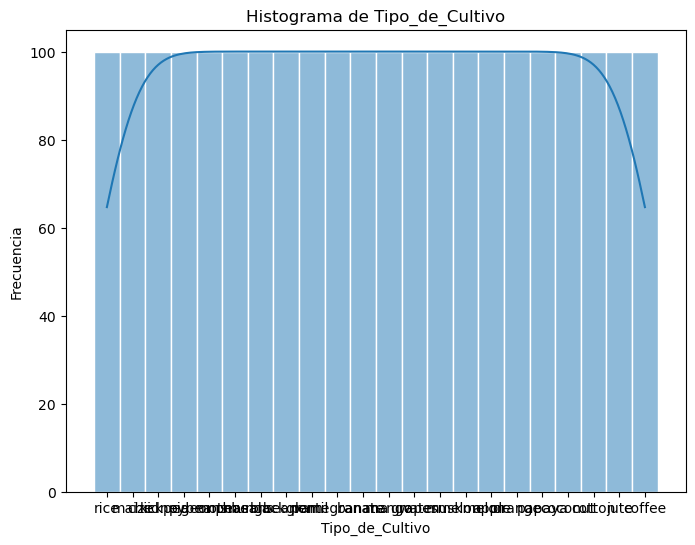

In [33]:
from funciones_importantes import plot_histograms

plot_histograms(cultivos)

<Axes: >

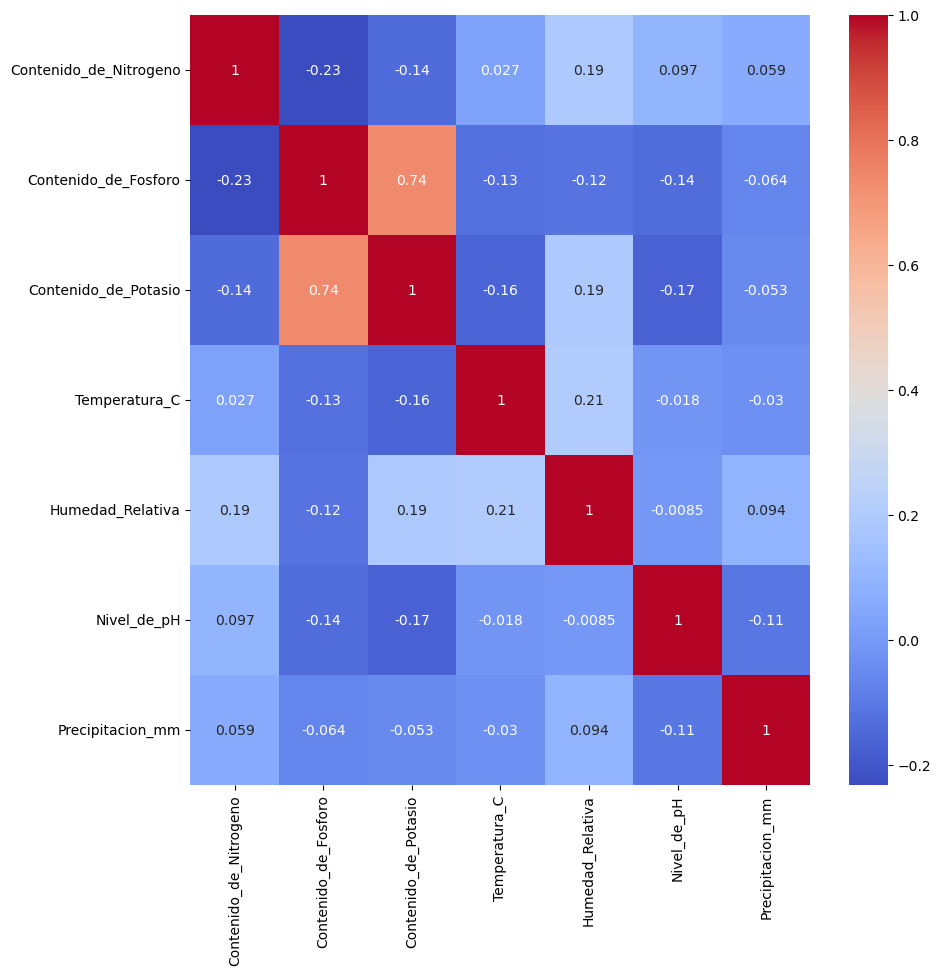

In [34]:
numeric_columns = cultivos.select_dtypes(include=[np.number])  # Selecciona solo las columnas numéricas

plt.figure(figsize = (10, 10))

sns.heatmap(
    numeric_columns.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10})

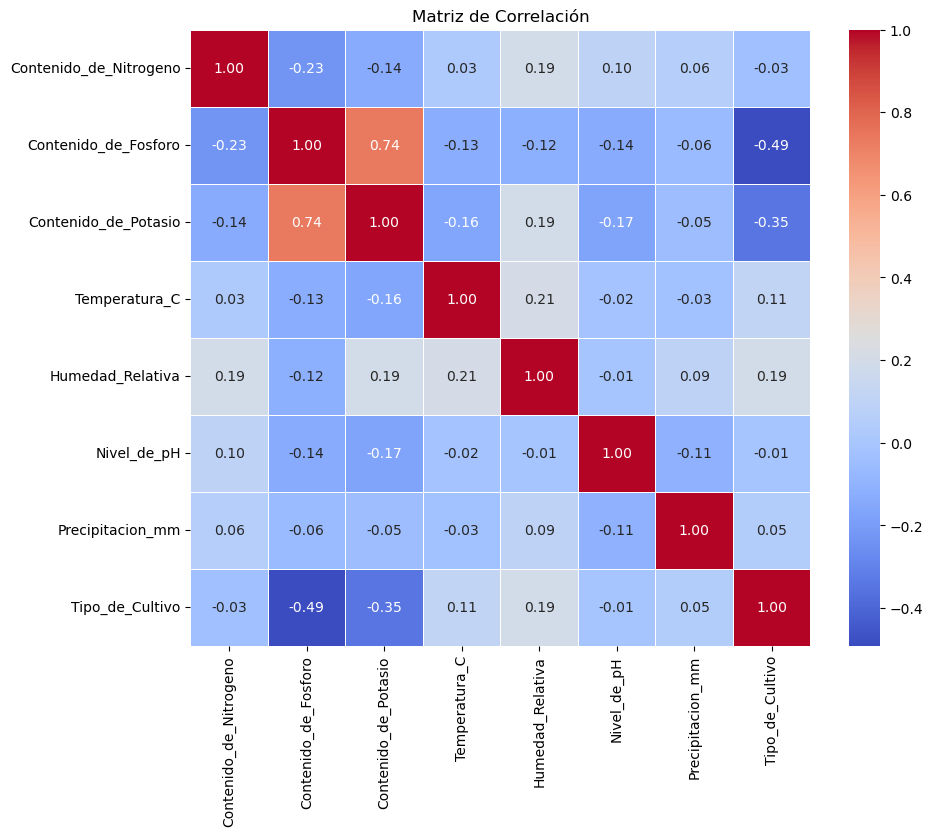

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Codifica la variable categórica 'Tipo_de_Cultivo' a números
cultivos['Tipo_de_Cultivo'] = cultivos['Tipo_de_Cultivo'].astype('category').cat.codes

# Calcula la matriz de correlación
matriz_correlacion = cultivos.corr()

# Visualiza la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()
